In [4]:
import pandas as pd

df = pd.read_csv('Rating organization comparison - Validi.csv')

df = df.drop(columns=['Pagina web', 'Dataset', 'Grado di reputabilità di testate giornalistiche', 'Grado di reputabilità di testate giornalistiche','Altre informazioni', 'Unnamed: 8'])
# Sostituisci i valori diversi da   "No" con "Sì" nella colonna "Criteri automatizzabili"
df.loc[df['Criteri automatizzabili'] != 'No', 'Criteri automatizzabili'] = 'Sì'

df

,Nome,Tipologia,Criteri automatizzabili,Metodologia di stima della reputabilità
0,Newsguard,Società,Sì,Annotatori professionali
1,Ground News,Società,Sì,Derivata da altre fonti\n
2,Ad Fontes Media (AFM),Società,Sì,Annotatori professionali
3,Media Bias/Fact Check,Società,Sì,Annotatori professionali
4,GDI,Società,Sì,Annotatori professionali
5,Wikipedia,Organizzazione senza scopo di lucro,No,Utenti non specializzati
6,Creddler,Società,No,Annotatori professionali e utenti non speciali...
7,Melissa Zimdars,Articolo di giornale,No,Utenti non specializzati
8,Poly Fact,Organizzazione senza scopo di lucro,No,Annotatori professionali
9,Butac,Sito web / Blog,No,Utenti non specializzati


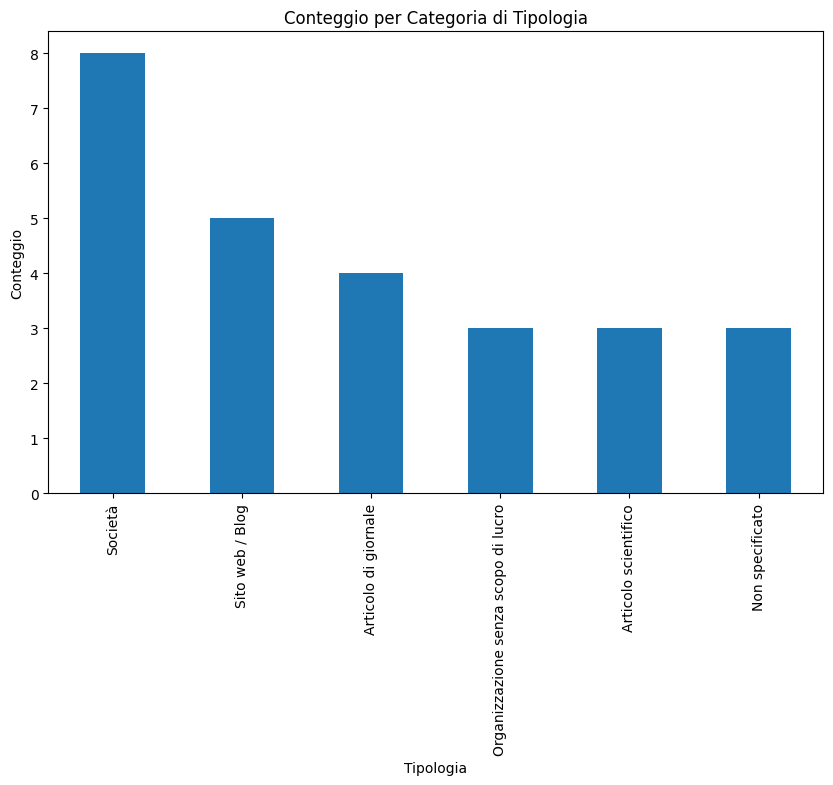

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creare il DataFrame (come nell'esempio precedente)

# Contare le occorrenze di ciascuna categoria "Tipologia"
tipologia_counts = df['Tipologia'].value_counts()

# Creare il grafico a barre
plt.figure(figsize=(10, 6))
tipologia_counts.plot(kind='bar')
plt.title('Conteggio per Categoria di Tipologia')
plt.xlabel('Tipologia')
plt.ylabel('Conteggio')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()


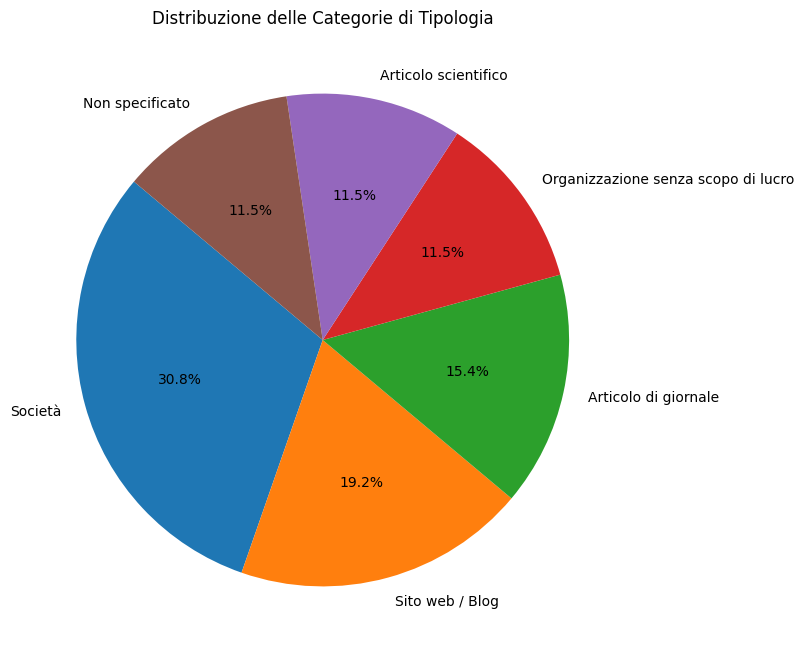

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Creare il DataFrame (come nell'esempio precedente)

# Contare le occorrenze di ciascuna categoria "Tipologia"
tipologia_counts = df['Tipologia'].value_counts()

# Creare il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(tipologia_counts, labels=tipologia_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle Categorie di Tipologia')
plt.show()


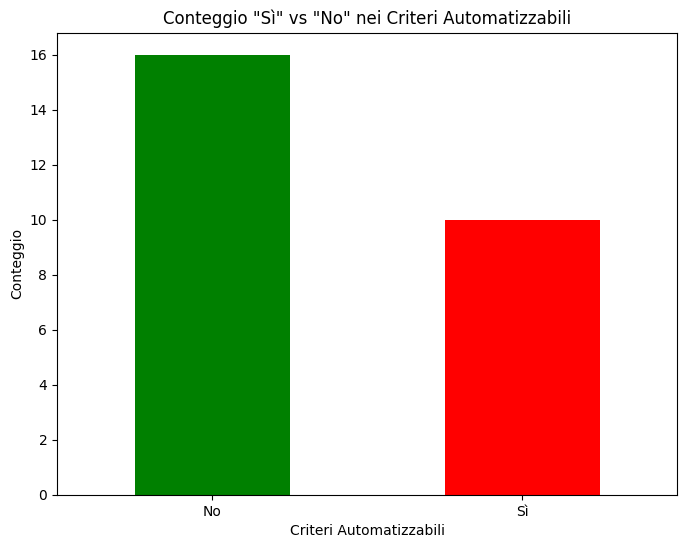

In [8]:

# Contare le occorrenze di "Sì" e "No"
si_no_counts = df['Criteri automatizzabili'].value_counts()

# Creare un grafico a barre
plt.figure(figsize=(8, 6))
si_no_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Conteggio "Sì" vs "No" nei Criteri Automatizzabili')
plt.xlabel('Criteri Automatizzabili')
plt.ylabel('Conteggio')
plt.xticks(rotation=0)
plt.show()

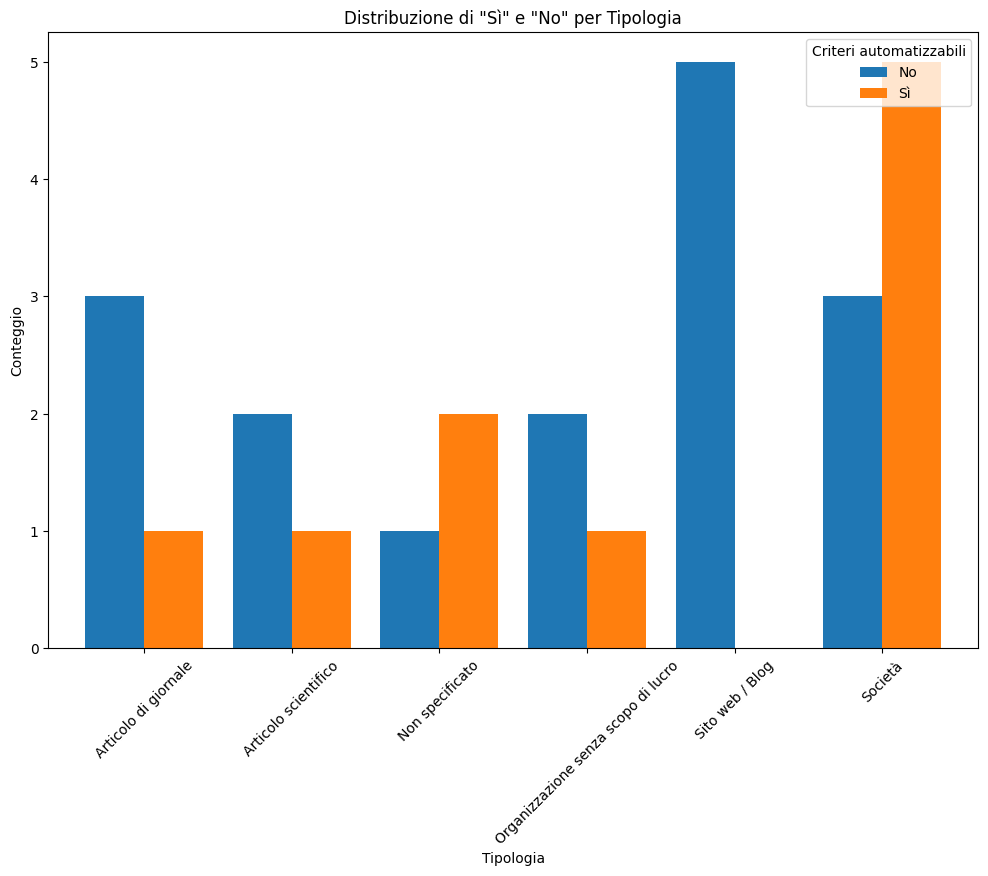

In [9]:

# Creare un DataFrame aggregato per il conteggio di "Sì" e "No suddiviso per "Tipologia"
grouped_data = df.groupby(['Tipologia', 'Criteri automatizzabili']).size().unstack(fill_value=0)

# Creare un grafico a barre raggruppato
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', width=0.8, ax=plt.gca())
plt.title('Distribuzione di "Sì" e "No" per Tipologia')
plt.xlabel('Tipologia')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.legend(title='Criteri automatizzabili', loc='upper right')
plt.show()

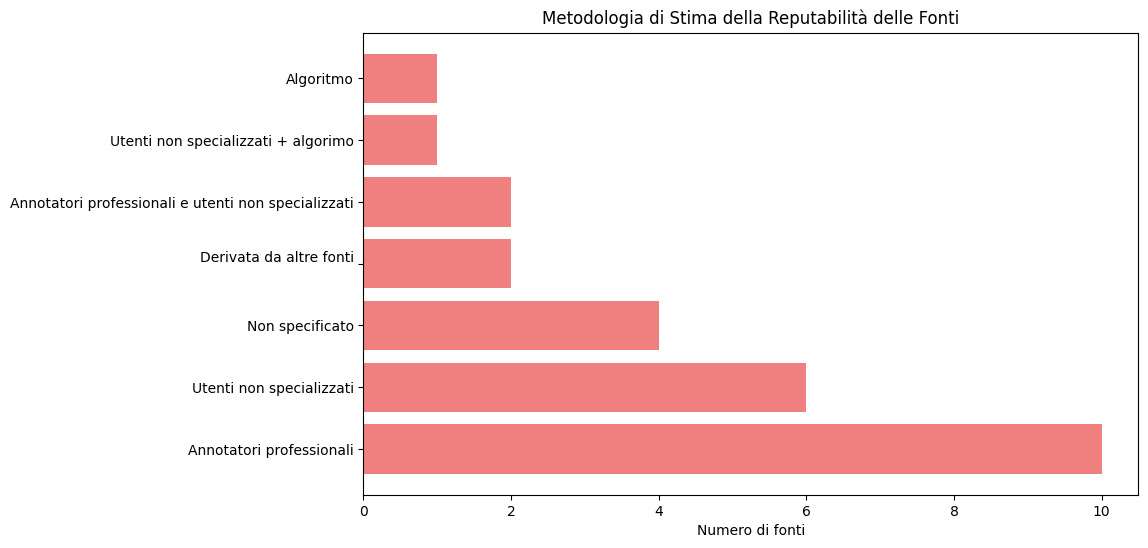

In [11]:
# Conteggio delle fonti con criteri automatizzabili
criteri_automatizzabili_count = df["Criteri automatizzabili"].value_counts()

# Conteggio delle fonti con metodologia specifica
metodologia_count = df["Metodologia di stima della reputabilità"].value_counts()

# Creazione del grafico a barre orizzontali per la metodologia di stima della reputabilità
plt.figure(figsize=(10, 6))
plt.barh(metodologia_count.index, metodologia_count.values, color='lightcoral')
plt.xlabel('Numero di fonti')
plt.title('Metodologia di Stima della Reputabilità delle Fonti')
plt.show()


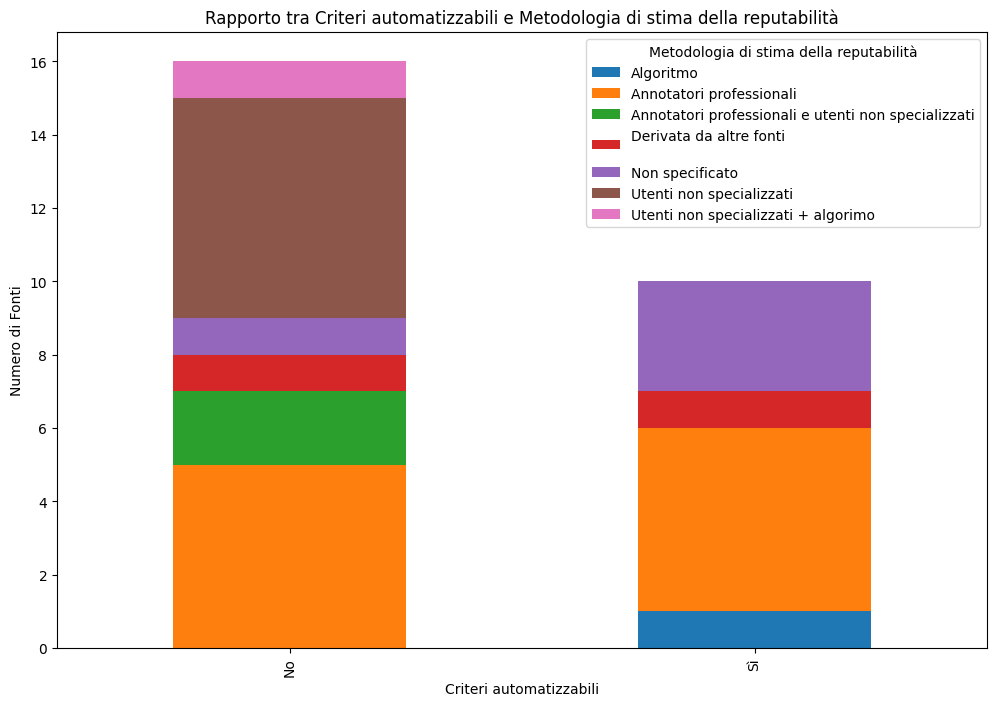

In [12]:

# Conteggio delle combinazioni di Criteri automatizzabili e Metodologia di stima della reputabilità
combinazioni = df.groupby(["Criteri automatizzabili", "Metodologia di stima della reputabilità"]).size().unstack()

# Creazione del grafico a barre impilato
combinazioni.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Criteri automatizzabili')
plt.ylabel('Numero di Fonti')
plt.title('Rapporto tra Criteri automatizzabili e Metodologia di stima della reputabilità')
plt.legend(title='Metodologia di stima della reputabilità')
plt.show()


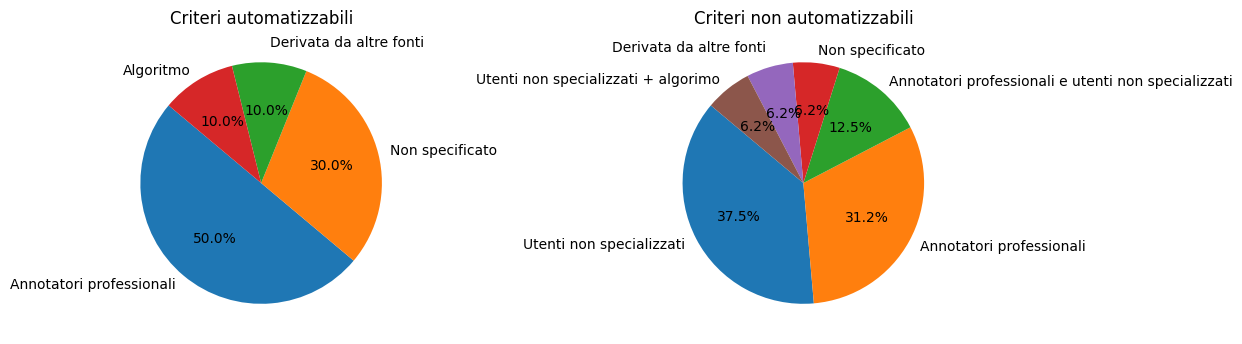

In [16]:
# Filtra il dataframe in base a Criteri automatizzabili
df_auto = df[df['Criteri automatizzabili'] == 'Sì']
df_non_auto = df[df['Criteri automatizzabili'] == 'No']

# Conteggio delle combinazioni di Metodologia di stima della reputabilità per Criteri automatizzabili
combinazioni_auto = df_auto['Metodologia di stima della reputabilità'].value_counts()
combinazioni_non_auto = df_non_auto['Metodologia di stima della reputabilità'].value_counts()

# Creazione dei due grafici a torta
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(combinazioni_auto, labels=combinazioni_auto.index, autopct='%1.1f%%', startangle=140)
plt.title('Criteri automatizzabili')

plt.subplot(1, 2, 2)
plt.pie(combinazioni_non_auto, labels=combinazioni_non_auto.index, autopct='%1.1f%%', startangle=140)
plt.title('Criteri non automatizzabili')

plt.tight_layout()
plt.show()





